# Exploratory Data Analysis on Data Science Salaries
### we will be analysing the salaries received by people in different data related jobs and do a comparative study
### on that

In [58]:
# import necessary libraries
import numpy as np # for numerical analysis
import pandas as pd # for data wrangling
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization

import warnings
warnings.filterwarnings("ignore") # supress warning messages

In [59]:
data = pd.read_csv("D:/data sets/data scientists salaries/ds_salaries.csv") # read the data from csv file


print(data.shape) # showing the number of rows and columns of the data

(3755, 11)


In [60]:
data.head() # showing the first 6 rows of the data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [61]:
# deleting the unnecessary columns
data.drop(['salary','salary_currency'],axis=1, inplace = True)

In [62]:
data.head() #data after deleting unnecessary columns

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [63]:
#counting duplicate columns if exists
len(data)-len(data.drop_duplicates())

1171

In [64]:
#deleting duplicate columns because there are 1171 duplicate columns that exists
data = data.drop_duplicates()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_in_usd       2584 non-null   int64 
 5   employee_residence  2584 non-null   object
 6   remote_ratio        2584 non-null   int64 
 7   company_location    2584 non-null   object
 8   company_size        2584 non-null   object
dtypes: int64(3), object(6)
memory usage: 201.9+ KB


In [66]:
# checking number of unique values in each columns
data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [67]:
#checking null values if any
data.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [68]:
#checking statistical description of the data
data.describe(include = "all")

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,2584.000000,2584,2584,2584,2584.000000,2584,2584.000000,2584,2584
unique,NaN,4,4,93,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,US,NaN,US,M
freq,NaN,1554,2547,598,NaN,1893,NaN,1929,2028
mean,2022.301084,NaN,NaN,NaN,133409.280186,NaN,50.483746,NaN,NaN
std,0.749179,NaN,NaN,NaN,67136.837329,NaN,48.163707,NaN,NaN
min,2020.000000,NaN,NaN,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,84975.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,130000.000000,NaN,50.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,175000.000000,NaN,100.000000,NaN,NaN


<AxesSubplot:>

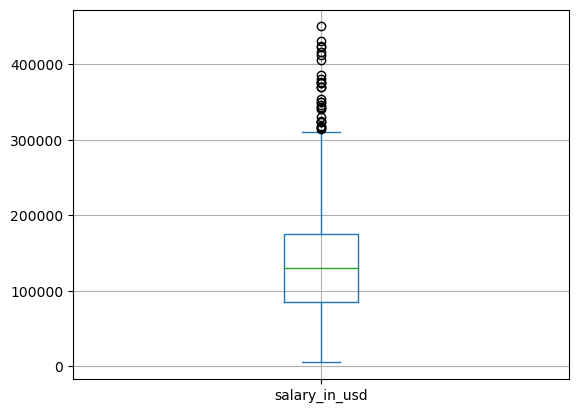

In [69]:
# the column SALARY seems to have some outliers.. lets check graphically

data.salary_in_usd.plot(kind = "box", grid = True)



<AxesSubplot:ylabel='Frequency'>

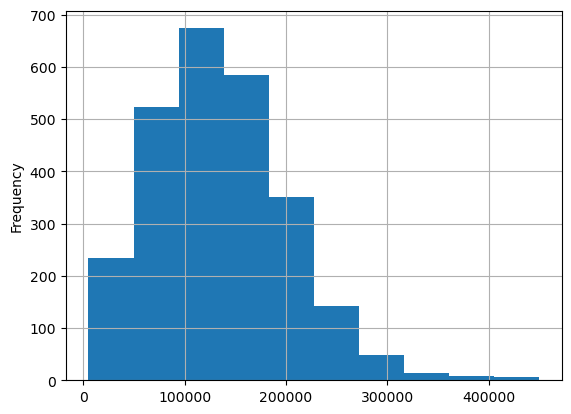

In [70]:
data.salary_in_usd.plot(kind = "hist", grid = True)

In [71]:
# but this skewness in the data is considerable

## let us do some transformation in the rows and increase clarity in the data

In [72]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [73]:
data.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [74]:
def func(row):
    if row['employment_type'] == 'FT':
        return 'Full Time'
    elif row['employment_type'] == 'CT':
        return 'Contractual'
    elif row['employment_type'] == 'FL':
        return 'Freelance'
    else:
        return 'part Time'

data['EmploymentType'] = data.apply(func, axis=1)


In [75]:
def func(row):
    if row['company_size'] == 'L':
        return 'Large'
    elif row['company_size'] == 'S':
        return 'Small'
    else:
        return 'Medium'

data['CompanySize'] = data.apply(func, axis=1)


In [76]:
def func(row):
    if row['experience_level'] == 'SE':
        return 'Senior'
    elif row['experience_level'] == 'MI':
        return 'Mid-Senior'
    elif row['experience_level'] == 'EN':
        return 'EntryLevel'
    else:
        return 'Experienced'

data['ExperienceLevel'] = data.apply(func, axis=1)


In [77]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,EmploymentType,CompanySize,ExperienceLevel
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L,Full Time,Large,Senior
1,2023,MI,CT,ML Engineer,30000,US,100,US,S,Contractual,Small,Mid-Senior
2,2023,MI,CT,ML Engineer,25500,US,100,US,S,Contractual,Small,Mid-Senior
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M,Full Time,Medium,Senior
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M,Full Time,Medium,Senior


In [78]:
data.drop(['experience_level', 'employment_type', 'company_size'], axis = 1, inplace = True)
data.head()


,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,EmploymentType,CompanySize,ExperienceLevel
0,2023,Principal Data Scientist,85847,ES,100,ES,Full Time,Large,Senior
1,2023,ML Engineer,30000,US,100,US,Contractual,Small,Mid-Senior
2,2023,ML Engineer,25500,US,100,US,Contractual,Small,Mid-Senior
3,2023,Data Scientist,175000,CA,100,CA,Full Time,Medium,Senior
4,2023,Data Scientist,120000,CA,100,CA,Full Time,Medium,Senior


In [79]:
df= data

## now we will analyse the data graphically

Text(0.5, 0, 'salary in usd')

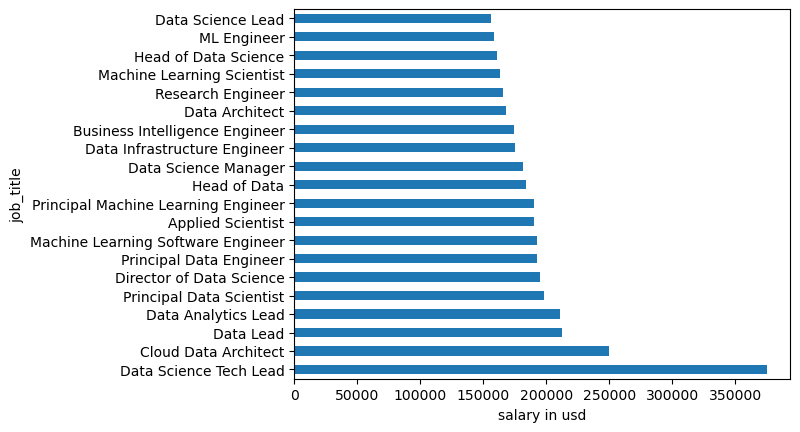

In [86]:
# top 20 job title and their average salary in USD

df.groupby(["job_title"]).salary_in_usd.mean().sort_values(ascending = False).head(20).plot(kind = "barh")
plt.xlabel("salary in usd")

Text(0.5, 0, 'salary in usd')

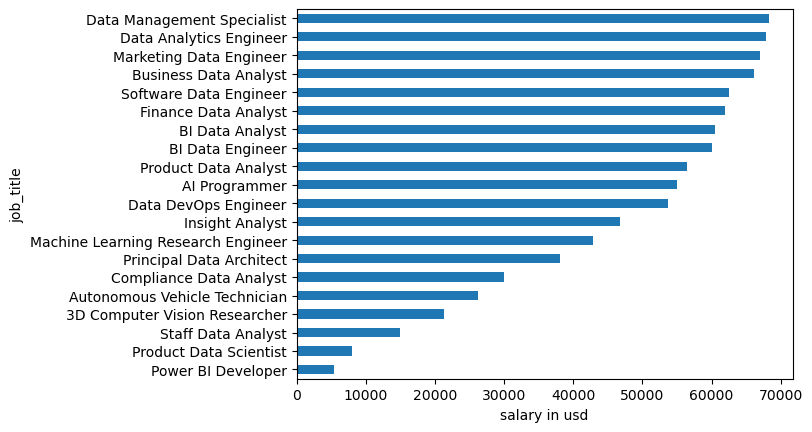

In [87]:
# bottom 20 job title and their salary in USD

df.groupby(["job_title"]).salary_in_usd.mean().sort_values(ascending = True).head(20).plot(kind = "barh")
plt.xlabel("salary in usd")

Text(0.5, 1.0, 'entry level jobs')

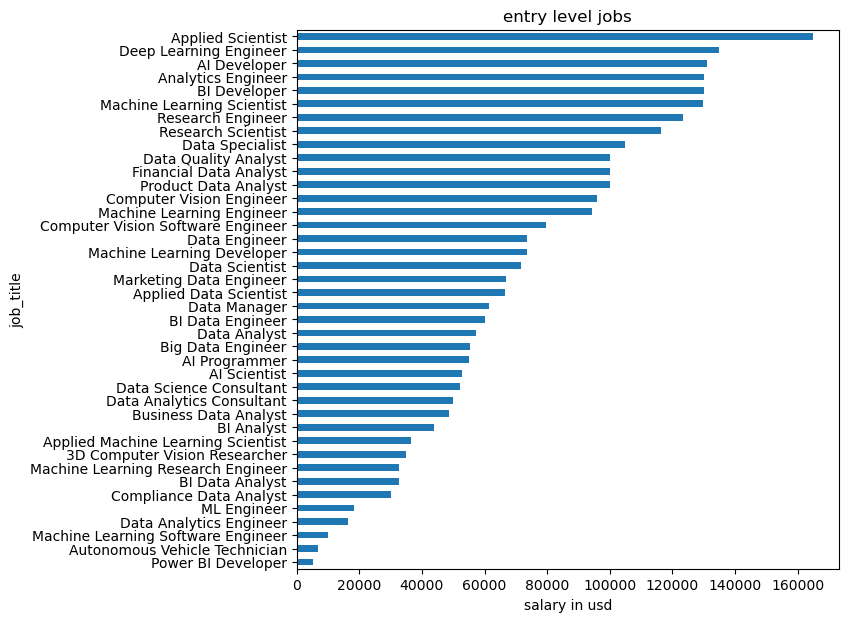

In [98]:
# detailed comaprison of the ENTRY LEVEL job titles

df[df.ExperienceLevel=='EntryLevel'].groupby(["job_title"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh", figsize =(7,7))
plt.xlabel("salary in usd")
plt.title("entry level jobs")

Text(0.5, 0, 'salary in usd')

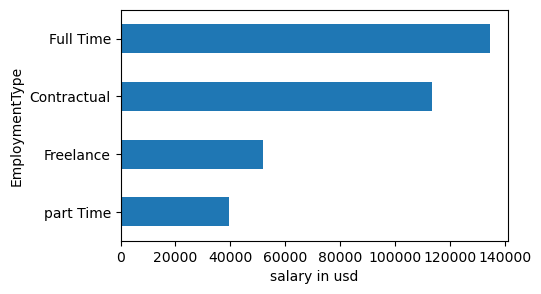

In [149]:
# comparison between different employment type and salary is USD 

df.groupby(["EmploymentType"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh", figsize=(5,3))
plt.xlabel("salary in usd")

Text(0.5, 0, 'salary in usd')

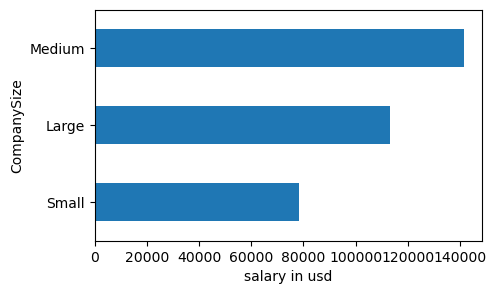

In [150]:
# comparison between different company size and salary is USD 

df.groupby(["CompanySize"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh", figsize=(5,3))
plt.xlabel("salary in usd")

Text(0.5, 0, 'salary in usd')

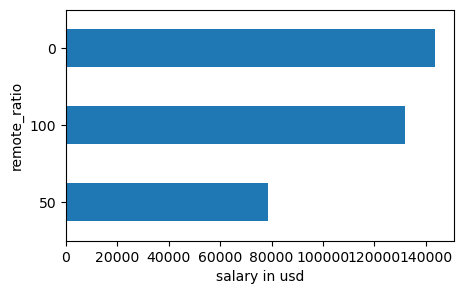

In [151]:
# comparison between different working flexibility and salary is USD 

df.groupby(["remote_ratio"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh", figsize=(5,3))
plt.xlabel("salary in usd")

Text(0.5, 0, 'salary in usd')

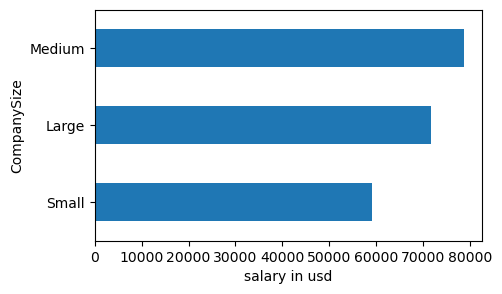

In [152]:
# comparison between different Company size and salary is USD 

df[df.ExperienceLevel=='EntryLevel'].groupby(["CompanySize"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh", figsize=(5,3))
plt.xlabel("salary in usd")

### comparative study between experience level and other factors

In [109]:
df.ExperienceLevel.unique()

array(['Senior', 'Mid-Senior', 'EntryLevel', 'Experienced'], dtype=object)

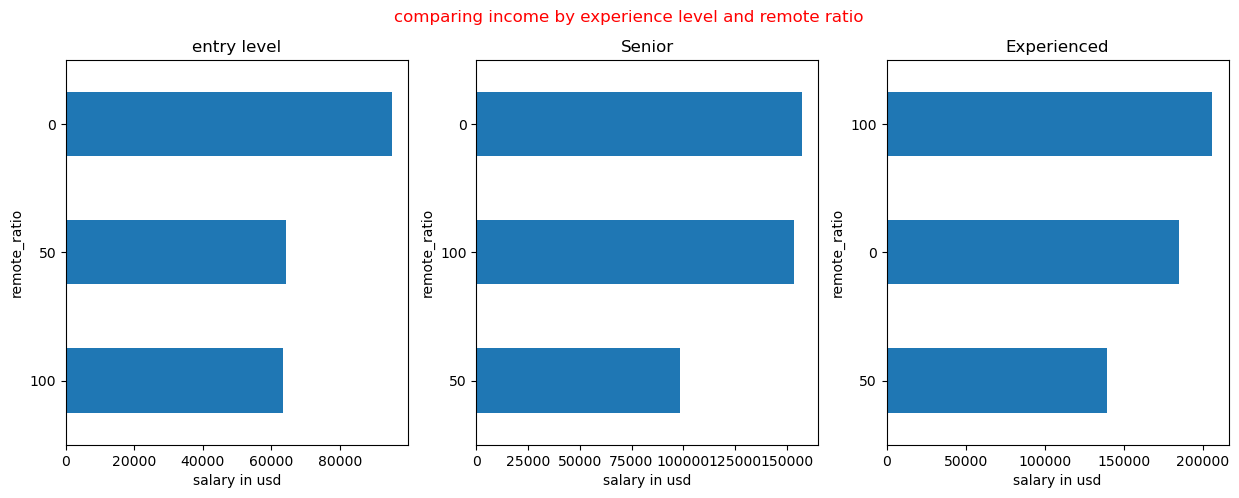

In [154]:
plt.subplot(1,3,1)
df[df.ExperienceLevel=='EntryLevel'].groupby(["remote_ratio"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh", figsize = (15,5))
plt.xlabel("salary in usd")
plt.title("entry level")

plt.subplot(1,3,2)
df[df.ExperienceLevel=='Senior'].groupby(["remote_ratio"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh")
plt.xlabel("salary in usd")
plt.title("Senior")

plt.subplot(1,3,3)
df[df.ExperienceLevel=='Experienced'].groupby(["remote_ratio"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh")
plt.xlabel("salary in usd")
plt.title("Experienced")

plt.suptitle("comparing income by experience level and remote ratio", color=("red"))
plt.show()


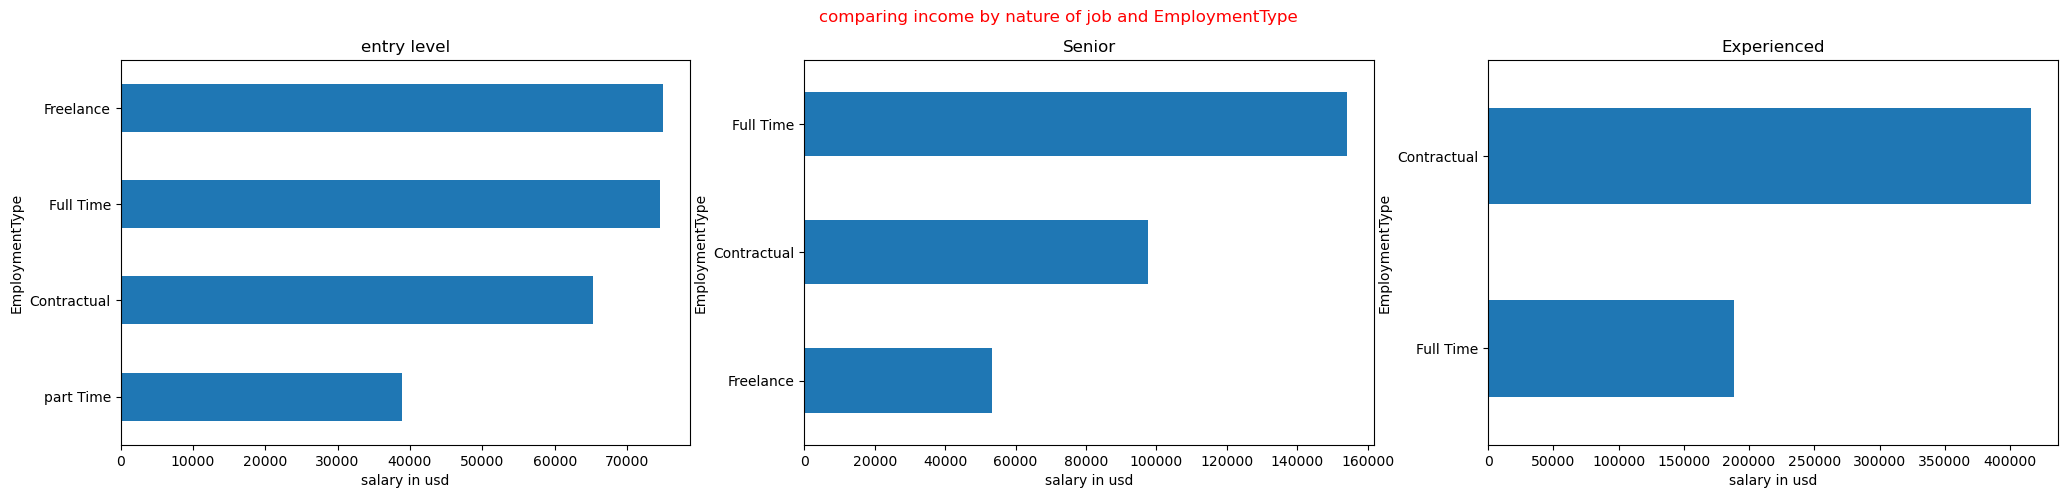

In [155]:
plt.subplot(1,3,1)
df[df.ExperienceLevel=='EntryLevel'].groupby(["EmploymentType"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh", figsize = (25,5))
plt.xlabel("salary in usd")
plt.title("entry level")

plt.subplot(1,3,2)
df[df.ExperienceLevel=='Senior'].groupby(["EmploymentType"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh")
plt.xlabel("salary in usd")
plt.title("Senior")

plt.subplot(1,3,3)
df[df.ExperienceLevel=='Experienced'].groupby(["EmploymentType"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh")
plt.xlabel("salary in usd")
plt.title("Experienced")

plt.suptitle("comparing income by nature of job and EmploymentType", color=("red"))
plt.show()

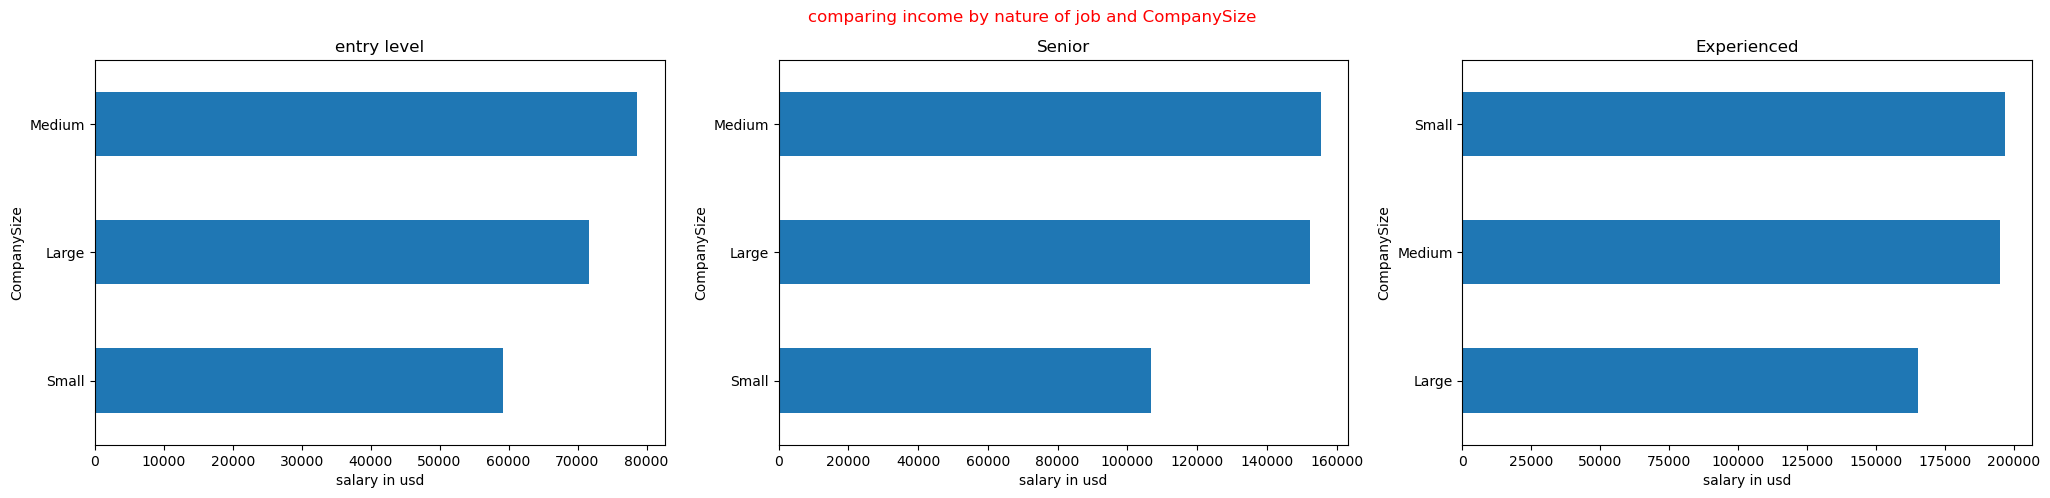

In [156]:
plt.subplot(1,3,1)
df[df.ExperienceLevel=='EntryLevel'].groupby(["CompanySize"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh", figsize = (25,5))
plt.xlabel("salary in usd")
plt.title("entry level")

plt.subplot(1,3,2)
df[df.ExperienceLevel=='Senior'].groupby(["CompanySize"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh")
plt.xlabel("salary in usd")
plt.title("Senior")

plt.subplot(1,3,3)
df[df.ExperienceLevel=='Experienced'].groupby(["CompanySize"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "barh")
plt.xlabel("salary in usd")
plt.title("Experienced")

plt.suptitle("comparing income by nature of job and CompanySize", color=("red"))
plt.show()

Text(0.5, 1.0, 'Salary by company location')

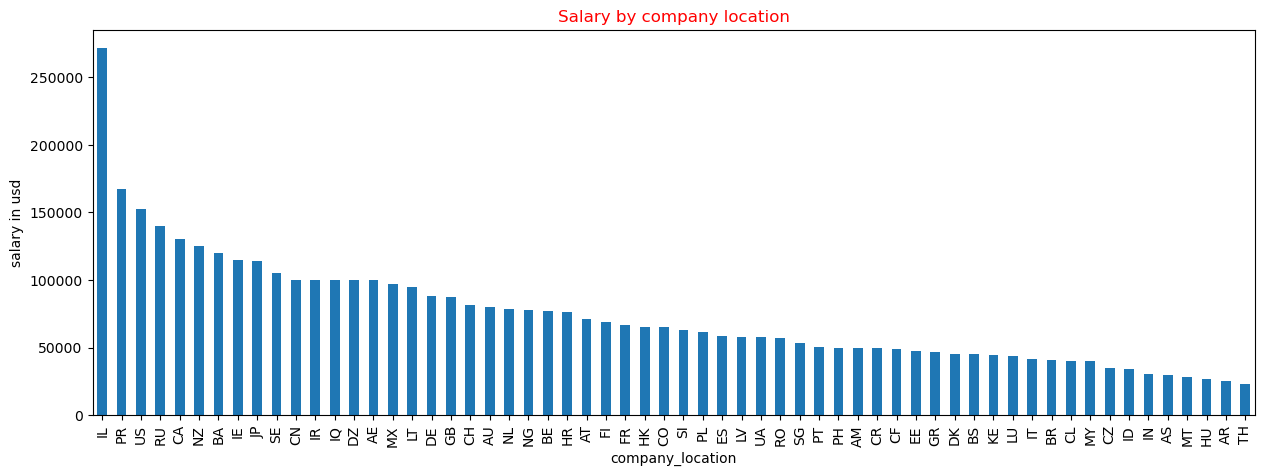

In [142]:
# Average salary paid based on different states

df.groupby(["company_location"]).salary_in_usd.mean().sort_values(ascending = False).head(60).plot(kind = "bar", figsize =(15,5))
plt.ylabel("salary in usd")
plt.title("Salary by company location", color = ("red"))

Text(0.5, 1.0, 'Increment in data related Salary by year')

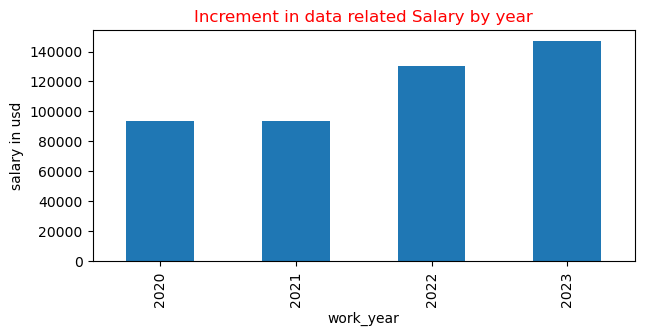

In [157]:
# increment in average salaries of data related profession by year

df.groupby(["work_year"]).salary_in_usd.mean().sort_values(ascending = True).plot(kind = "bar", figsize =(7,3))
plt.ylabel("salary in usd")
plt.title("Increment in data related Salary by year", color = ("red"))

In [158]:
df.head()

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,EmploymentType,CompanySize,ExperienceLevel
0,2023,Principal Data Scientist,85847,ES,100,ES,Full Time,Large,Senior
1,2023,ML Engineer,30000,US,100,US,Contractual,Small,Mid-Senior
2,2023,ML Engineer,25500,US,100,US,Contractual,Small,Mid-Senior
3,2023,Data Scientist,175000,CA,100,CA,Full Time,Medium,Senior
4,2023,Data Scientist,120000,CA,100,CA,Full Time,Medium,Senior
